In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Qyelp = pd.read_json("C:/Users/justy/Documents/GitHub/inf553-adjusted-ratings/dataset-extraction/thousand.json")

In [2]:
# Create metrics per user
DCount = Qyelp.groupby('user_id')['review_id'].count().to_dict()
DAvg = Qyelp.groupby('user_id')['stars'].mean().to_dict()
DMed = Qyelp.groupby('user_id')['stars'].median().to_dict()
DMin = Qyelp.groupby('user_id')['stars'].min().to_dict()
DMax = Qyelp.groupby('user_id')['stars'].max().to_dict()
DStd = Qyelp.groupby('user_id')['stars'].std().to_dict()

QDist = pd.DataFrame(Qyelp['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QDist))
QDist['Reviews'] = QDist['user_id'].map(DCount)
QDist['Mean'] = QDist['user_id'].map(DAvg)
QDist['Std Dev'] = QDist['user_id'].map(DStd)
QDist['Max'] = QDist['user_id'].map(DMax)
QDist['Median'] = QDist['user_id'].map(DMed)
QDist['Min'] = QDist['user_id'].map(DMin)

QDist.head(5)

Number of Users: 188


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.2,1.751190,5,3.0,1
1,TlvV-xJhmh7LCwJYXkV-cg,1,5.0,NaN,5,5.0,5
2,NhOc64RsrTT1Dls50yYW8g,2,3.0,2.828427,5,3.0,1
3,LKcdcMrq2xDzIThSHiZmLg,1,4.0,NaN,4,4.0,4
4,hxqo4NyJFfeOmuoVi--s1A,1,5.0,NaN,5,5.0,5


In [76]:
# Output results to json file
json = QDist.to_json("user_summary.json", orient='records')


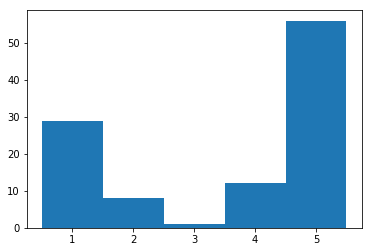

In [3]:
plt.hist(QDist[QDist['Reviews'] == 1]['Mean'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.show()

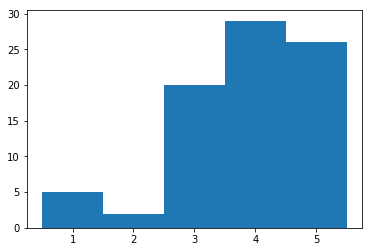

In [4]:
plt.hist(QDist[QDist['Reviews'] >= 2]['Mean'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.show()

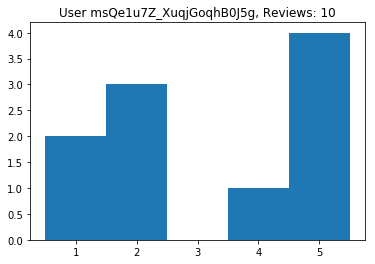

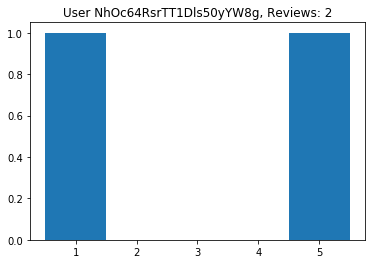

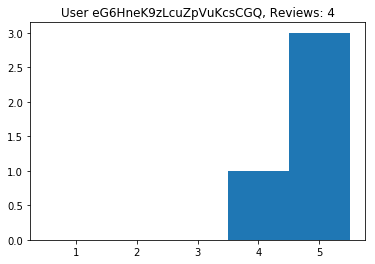

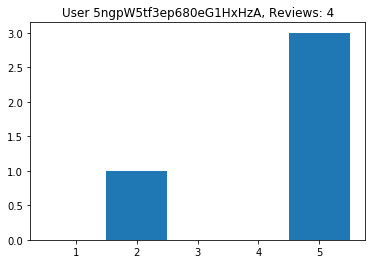

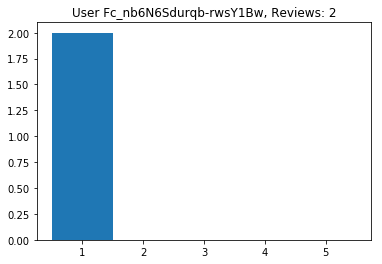

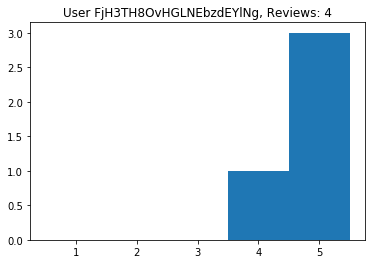

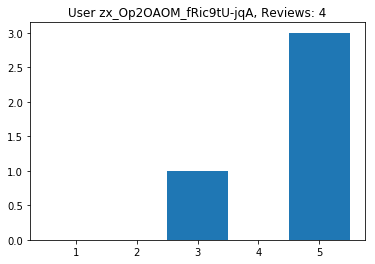

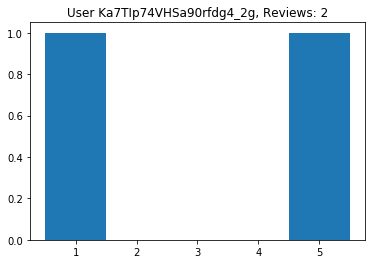

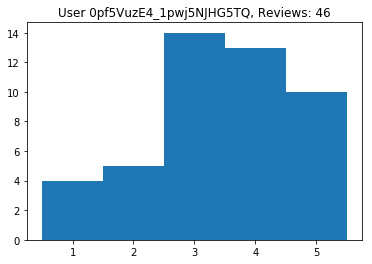

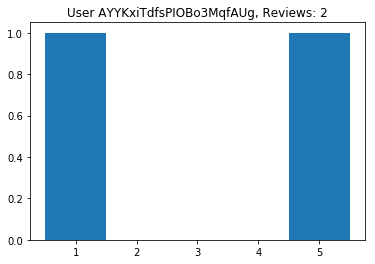

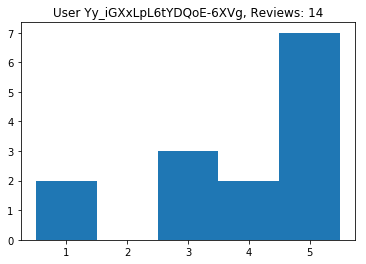

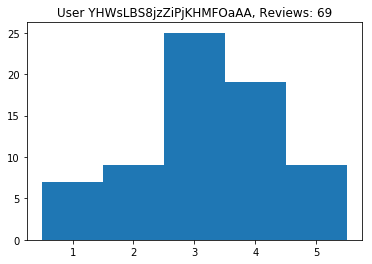

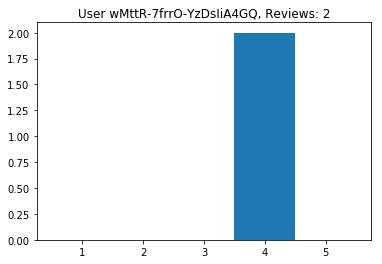

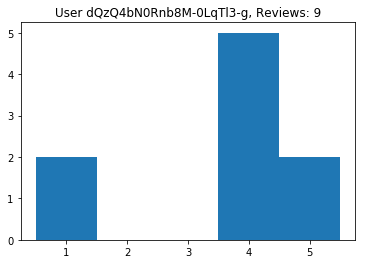

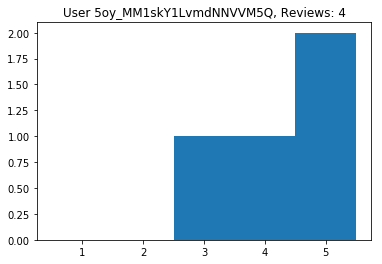

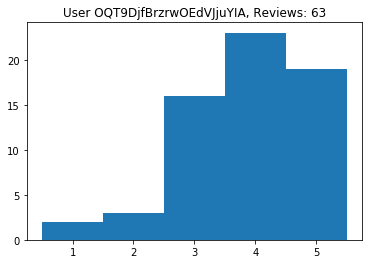

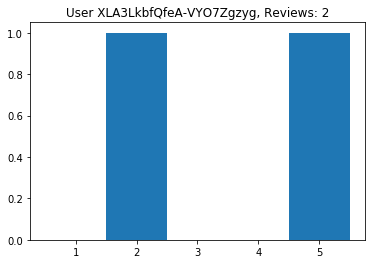

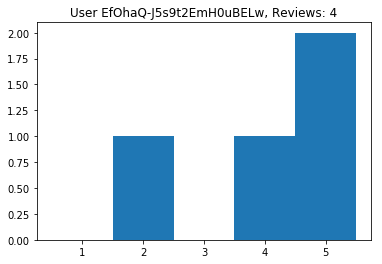

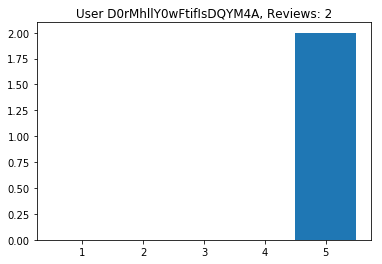

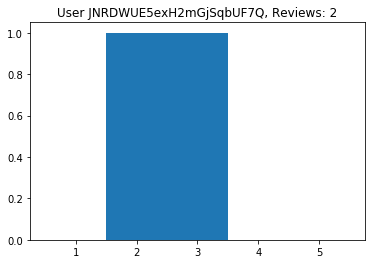

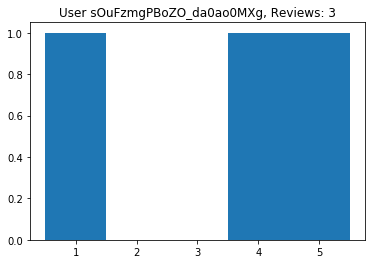

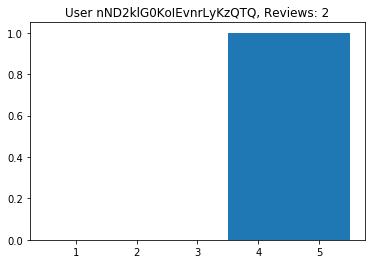

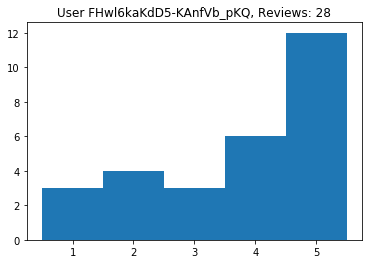

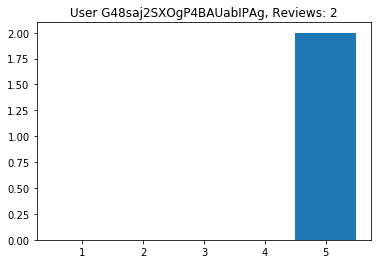

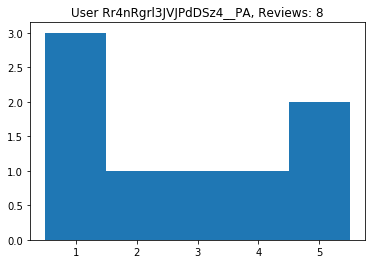

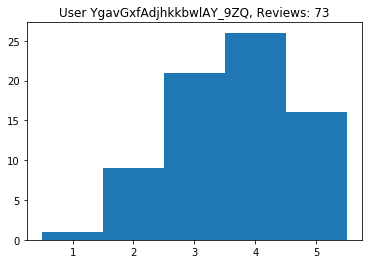

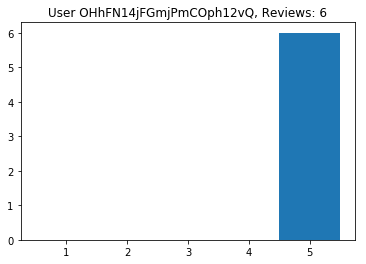

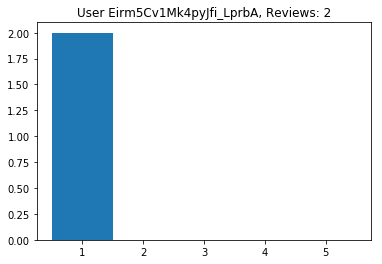

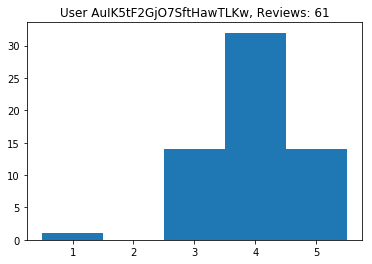

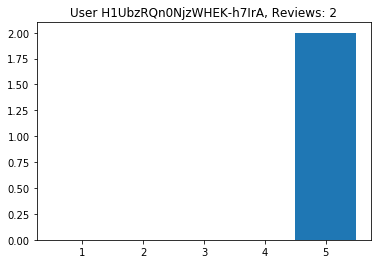

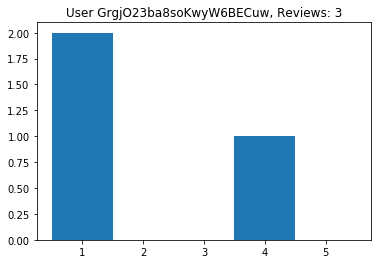

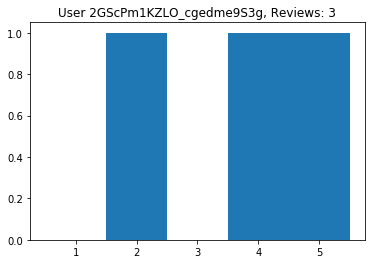

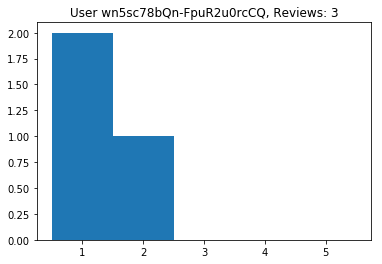

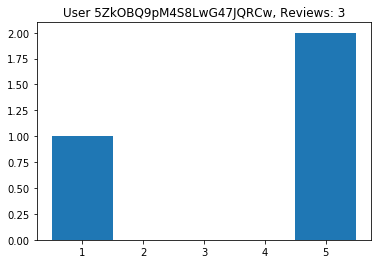

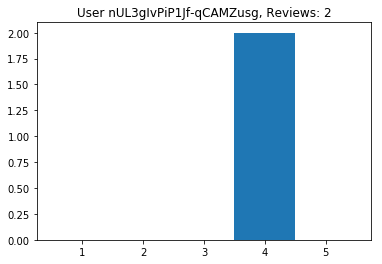

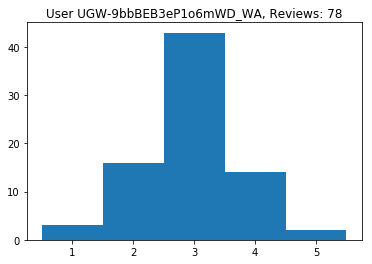

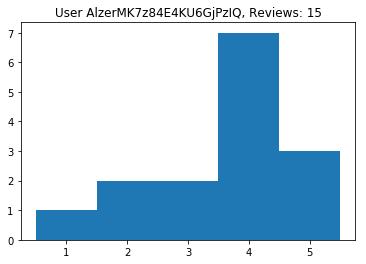

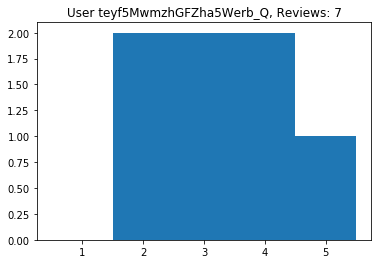

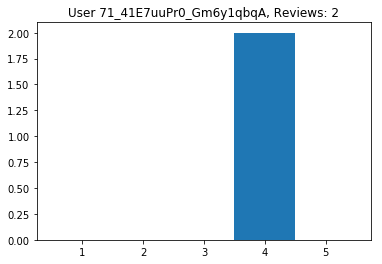

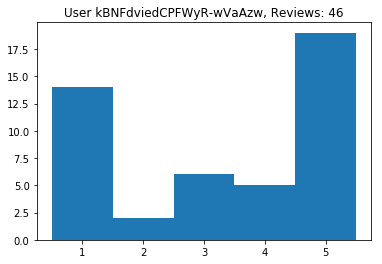

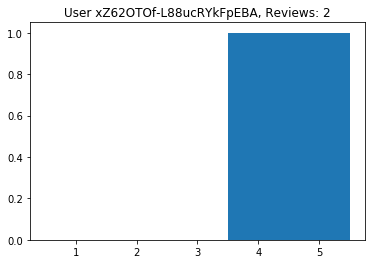

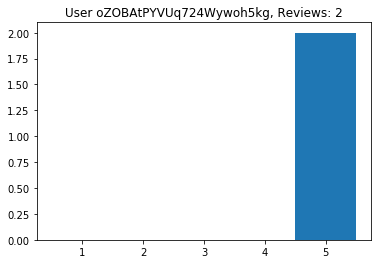

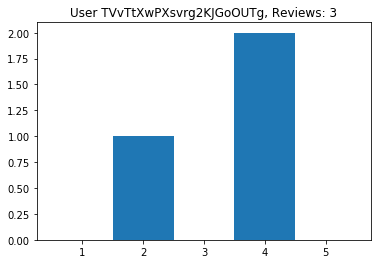

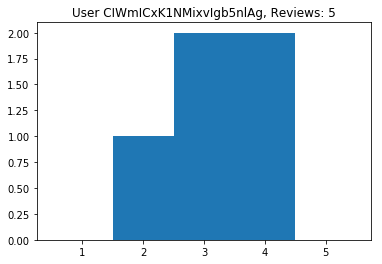

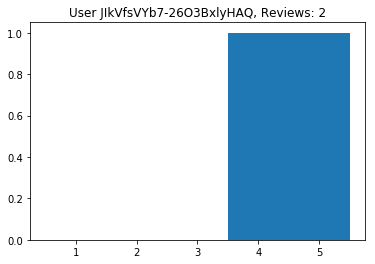

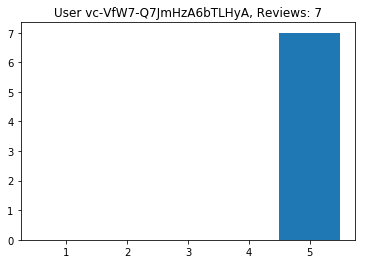

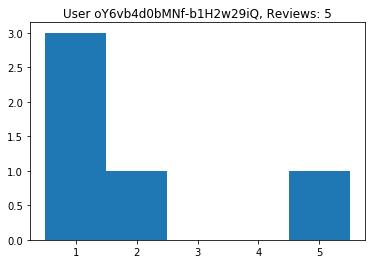

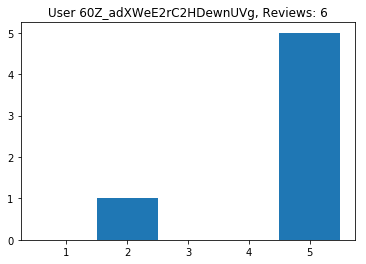

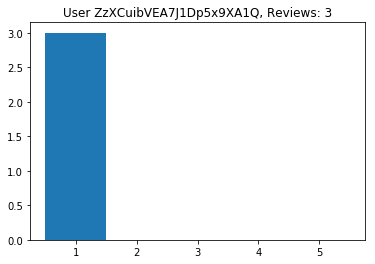

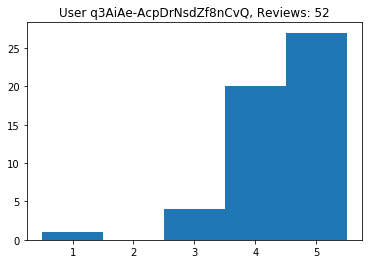

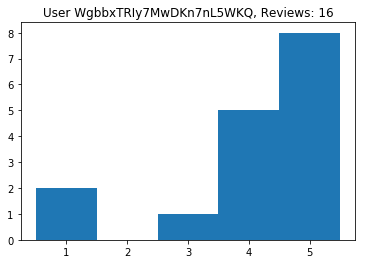

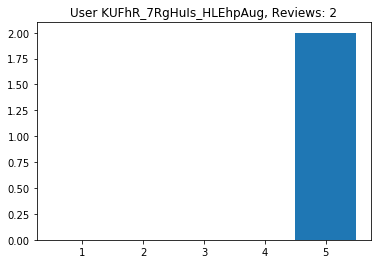

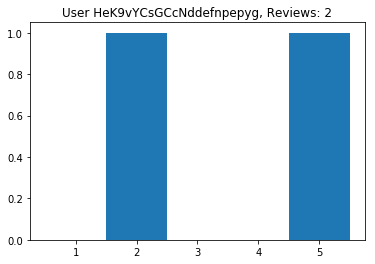

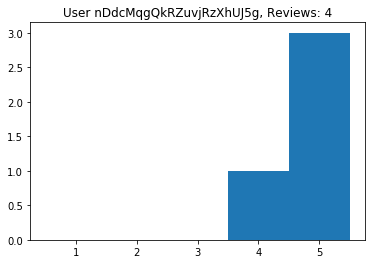

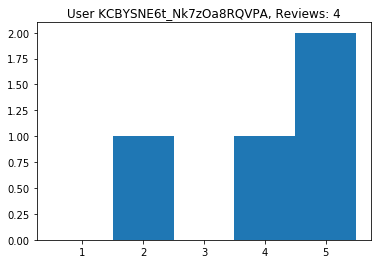

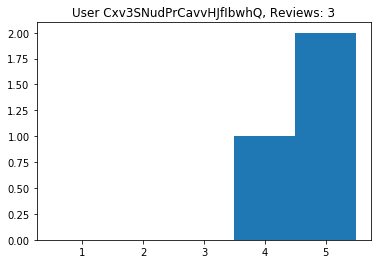

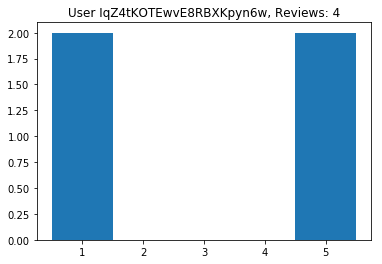

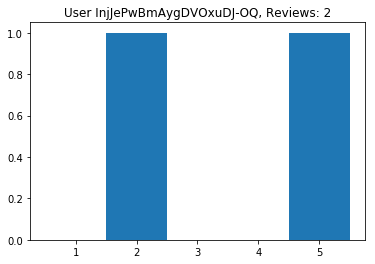

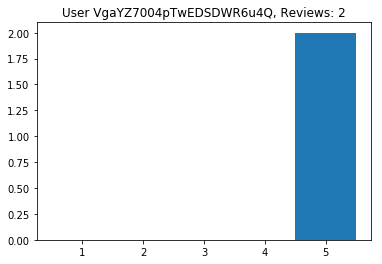

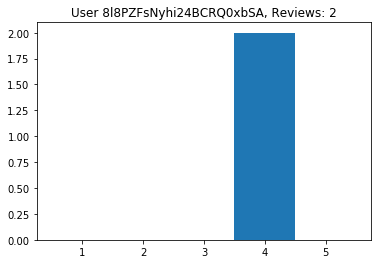

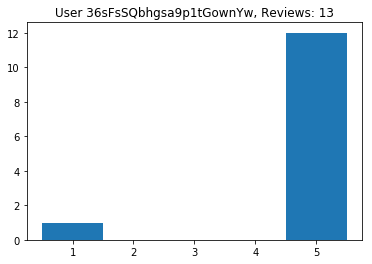

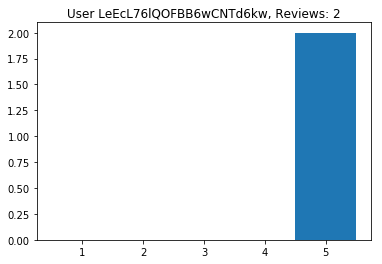

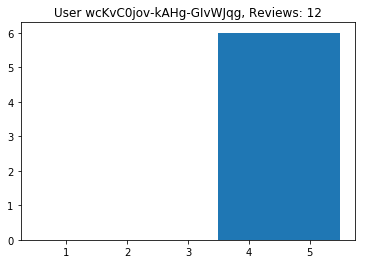

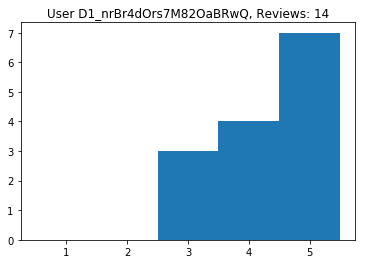

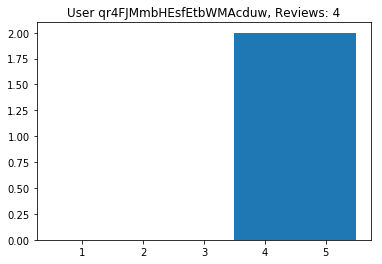

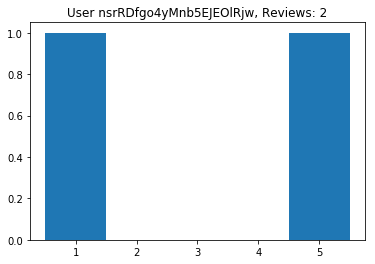

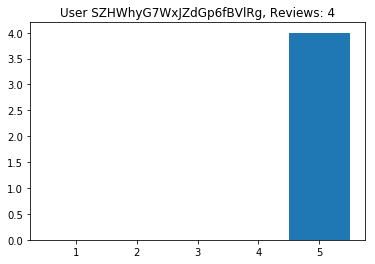

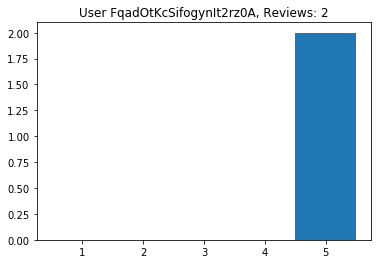

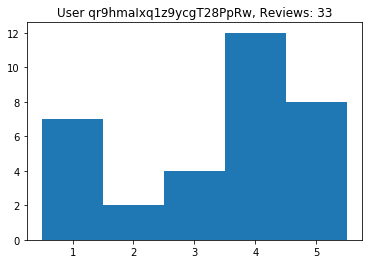

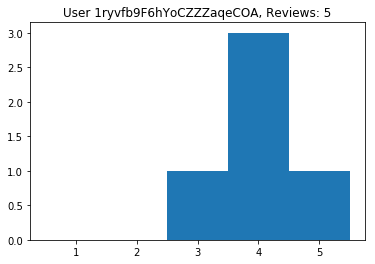

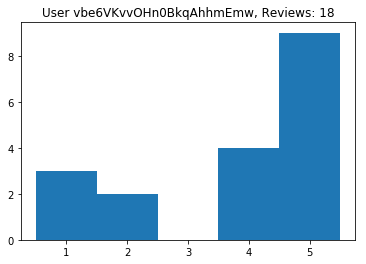

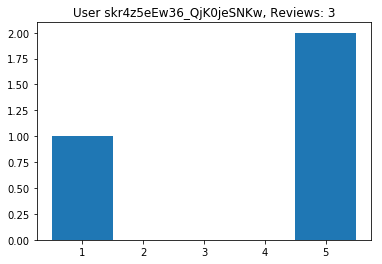

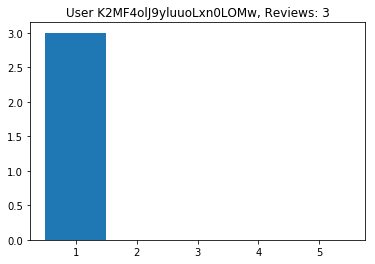

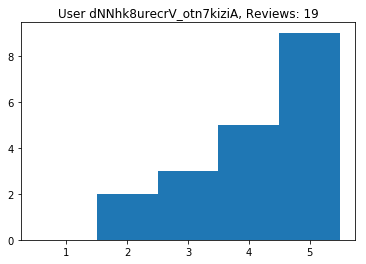

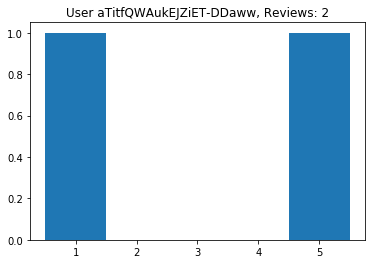

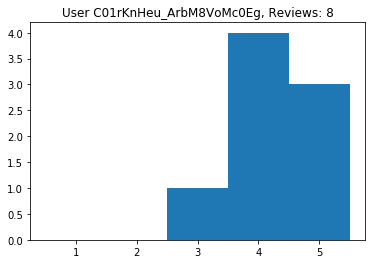

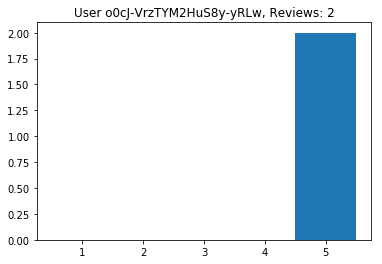

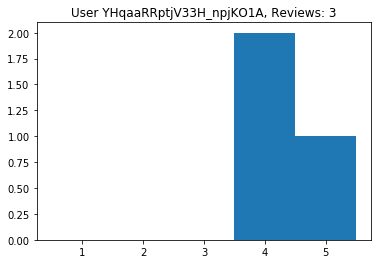

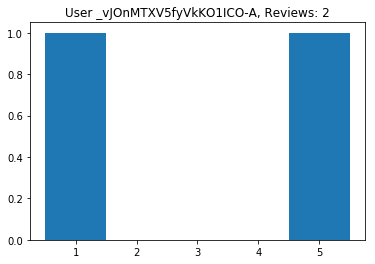

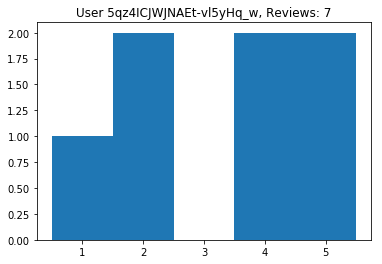

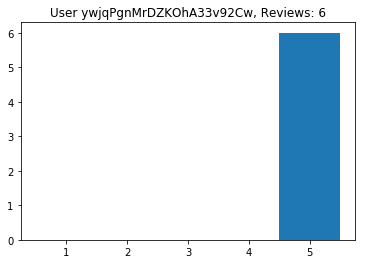

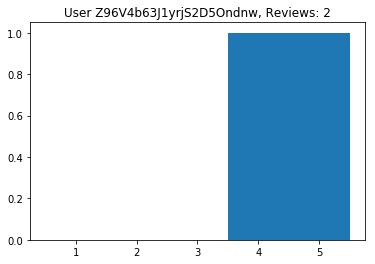

In [12]:
for user in QDist[QDist['Reviews']>1]['user_id']:
    plt.hist(Qyelp[Qyelp['user_id']==user]['stars'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
    plt.title("User %s, Reviews: %d" % (user, QDist[QDist['user_id']==user]['Reviews']))
    plt.show()

In [5]:

QDist.head(5)

,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.2,1.751190,5,3.0,1
1,TlvV-xJhmh7LCwJYXkV-cg,1,5.0,NaN,5,5.0,5
2,NhOc64RsrTT1Dls50yYW8g,2,3.0,2.828427,5,3.0,1
3,LKcdcMrq2xDzIThSHiZmLg,1,4.0,NaN,4,4.0,4
4,hxqo4NyJFfeOmuoVi--s1A,1,5.0,NaN,5,5.0,5


In [260]:
Qyelp['Mean'] = Qyelp['user_id'].map(DAvg)
Qyelp['Std'] = Qyelp['user_id'].map(DStd)
Qyelp['Count'] = Qyelp['user_id'].map(DCount)
Qyelp['T-score'] = (Qyelp['stars'] - Qyelp['Mean']) / (Qyelp['Std'])# / np.sqrt(Qyelp['Count']) )
Qyelp.head(5)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,Mean,Std,Count,T-score
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,10,-0.685248
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,10,1.027872
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,10,-1.256289
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,10,-0.685248
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,3.2,1.75119,10,1.027872


In [261]:
print("Users with average review between 2.5 and 3.5: %d" % len(Qyelp[(Qyelp['Mean'] < 3.5) & (Qyelp['Mean'] > 2.5)]['user_id'].unique()))
print("Users with average review above 3.5: %d" % len(Qyelp[Qyelp['Mean'] > 3.5]['user_id'].unique()))
print("Users with average review below 2.5: %d" % len(Qyelp[Qyelp['Mean'] < 2.5]['user_id'].unique()))

Users with average review between 2.5 and 3.5: 20
Users with average review above 3.5: 120
Users with average review below 2.5: 44


In [262]:
# Create metrics per user
DCount = Qyelp.groupby('user_id')['review_id'].count().to_dict()
D1 = Qyelp.groupby('user_id')['stars'].mean().to_dict()
D2 = Qyelp.groupby('user_id')['stars'].median().to_dict()
D3 = Qyelp.groupby('user_id')['stars'].min().to_dict()
D4 = Qyelp.groupby('user_id')['stars'].max().to_dict()
D5 = Qyelp.groupby('user_id')['stars'].std().to_dict()

QDist = pd.DataFrame(Qyelp['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QDist))
QDist['Reviews'] = QDist['user_id'].map(DCount)
QDist['Mean'] = QDist['user_id'].map(DAvg)
QDist['Std Dev'] = QDist['user_id'].map(DStd)
QDist['Max'] = QDist['user_id'].map(DMax)
QDist['Median'] = QDist['user_id'].map(DMed)
QDist['Min'] = QDist['user_id'].map(DMin)

QDist.head(5)

Number of Users: 188


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.2,1.751190,5,3.0,1
1,TlvV-xJhmh7LCwJYXkV-cg,1,5.0,NaN,5,5.0,5
2,NhOc64RsrTT1Dls50yYW8g,2,3.0,2.828427,5,3.0,1
3,LKcdcMrq2xDzIThSHiZmLg,1,4.0,NaN,4,4.0,4
4,hxqo4NyJFfeOmuoVi--s1A,1,5.0,NaN,5,5.0,5


In [194]:
StarCounts = pd.crosstab(Qyelp['user_id'], Qyelp['stars']).reset_index()

QCounts = QDist.merge(StarCounts, how="left", on="user_id")
QCounts.head(5)


,user_id,Reviews,Mean,Std Dev,Max,Median,Min,1,2,3,4,5
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.2,1.751190,5,3.0,1,2,3,0,1,4
1,TlvV-xJhmh7LCwJYXkV-cg,1,5.0,NaN,5,5.0,5,0,0,0,0,1
2,NhOc64RsrTT1Dls50yYW8g,2,3.0,2.828427,5,3.0,1,1,0,0,0,1
3,LKcdcMrq2xDzIThSHiZmLg,1,4.0,NaN,4,4.0,4,0,0,0,1,0
4,hxqo4NyJFfeOmuoVi--s1A,1,5.0,NaN,5,5.0,5,0,0,0,0,1


In [195]:
QCounts['Mode1'] = (QCounts[1] > QCounts[2]).astype(int)
QCounts['Mode2'] = ((QCounts[2] > QCounts[1]) & (QCounts[2] > QCounts[3])).astype(int)
QCounts['Mode3'] = ((QCounts[3] > QCounts[2]) & (QCounts[3] > QCounts[4])).astype(int)
QCounts['Mode4'] = ((QCounts[4] > QCounts[3]) & (QCounts[4] > QCounts[5])).astype(int)
QCounts['Mode5'] = (QCounts[5] > QCounts[4]).astype(int)

QCounts['Modal'] = QCounts['Mode1'] + QCounts['Mode2'] + QCounts['Mode3'] + QCounts['Mode4'] + QCounts['Mode5']
QCounts.head(5)

,user_id,Reviews,Mean,Std Dev,Max,Median,Min,1,2,3,4,5,Mode1,Mode2,Mode3,Mode4,Mode5,Modal
0,msQe1u7Z_XuqjGoqhB0J5g,10,3.2,1.751190,5,3.0,1,2,3,0,1,4,0,1,0,0,1,2
1,TlvV-xJhmh7LCwJYXkV-cg,1,5.0,NaN,5,5.0,5,0,0,0,0,1,0,0,0,0,1,1
2,NhOc64RsrTT1Dls50yYW8g,2,3.0,2.828427,5,3.0,1,1,0,0,0,1,1,0,0,0,1,2
3,LKcdcMrq2xDzIThSHiZmLg,1,4.0,NaN,4,4.0,4,0,0,0,1,0,0,0,0,1,0,1
4,hxqo4NyJFfeOmuoVi--s1A,1,5.0,NaN,5,5.0,5,0,0,0,0,1,0,0,0,0,1,1


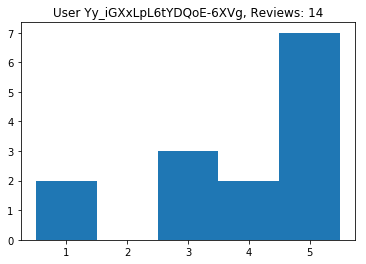

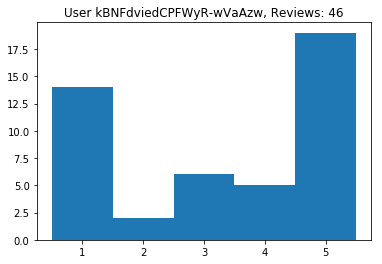

In [76]:
# Tri-Modals
user = 'Yy_iGXxLpL6tYDQoE-6XVg'
plt.hist(Qyelp[Qyelp['user_id']==user]['stars'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.title("User %s, Reviews: %d" % (user, QDist[QDist['user_id']==user]['Reviews']))
plt.show()
user = 'kBNFdviedCPFWyR-wVaAzw'
plt.hist(Qyelp[Qyelp['user_id']==user]['stars'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.title("User %s, Reviews: %d" % (user, QDist[QDist['user_id']==user]['Reviews']))
plt.show()

In [98]:
# put no modals into unimodals
QCounts.loc[QCounts['Modal']==0, 'Modal'] = 1

print('No modals: %i' % len(QCounts[QCounts['Modal']==0]))
print('Unimodals: %i' % len(QCounts[QCounts['Modal']==1]))
print('Bimodals: %i' % len(QCounts[QCounts['Modal']==2]))
print('Trimodals: %i' % len(QCounts[QCounts['Modal']==3]))

No modals: 0
Unimodals: 156
Bimodals: 30
Trimodals: 2


In [196]:
QModal = QCounts.drop(['Mean','Std Dev','Max','Median','Min',1,2,3,4,5,'Mode1','Mode2','Mode3','Mode4','Mode5'], axis=1)
QModal.head(2)

,user_id,Reviews,Modal
0,msQe1u7Z_XuqjGoqhB0J5g,10,2
1,TlvV-xJhmh7LCwJYXkV-cg,1,1


In [155]:
# Split ratings in half for calculations on bimodal users
QyelpHigh = Qyelp[Qyelp['stars'] >= 3]
QyelpLow = Qyelp[Qyelp['stars'] <= 3]

print('There are %d reviews 3 and above' % len(QyelpHigh))
print('There are %d reviews 3 and below' % len(QyelpLow))

There are 798 reviews 3 and above
There are 375 reviews 3 and below


In [156]:
# Create metrics per user
DCountHigh = QyelpHigh.groupby('user_id')['review_id'].count().to_dict()
DAvgHigh = QyelpHigh.groupby('user_id')['stars'].mean().to_dict()
DMedHigh = QyelpHigh.groupby('user_id')['stars'].median().to_dict()
DMinHigh = QyelpHigh.groupby('user_id')['stars'].min().to_dict()
DMaxHigh = QyelpHigh.groupby('user_id')['stars'].max().to_dict()
DStdHigh = QyelpHigh.groupby('user_id')['stars'].std().to_dict()

QdistHigh = pd.DataFrame(QyelpHigh['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QdistHigh))
QdistHigh['Reviews'] = QdistHigh['user_id'].map(DCountHigh)
QdistHigh['Mean'] = QdistHigh['user_id'].map(DAvgHigh)
QdistHigh['Std Dev'] = QdistHigh['user_id'].map(DStdHigh)
QdistHigh['Max'] = QdistHigh['user_id'].map(DMaxHigh)
QdistHigh['Median'] = QdistHigh['user_id'].map(DMedHigh)
QdistHigh['Min'] = QdistHigh['user_id'].map(DMinHigh)

QdistHigh.head(5)

Number of Users: 146


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,5,4.8,0.447214,5,5.0,4
1,TlvV-xJhmh7LCwJYXkV-cg,1,5.0,NaN,5,5.0,5
2,NhOc64RsrTT1Dls50yYW8g,1,5.0,NaN,5,5.0,5
3,LKcdcMrq2xDzIThSHiZmLg,1,4.0,NaN,4,4.0,4
4,hxqo4NyJFfeOmuoVi--s1A,1,5.0,NaN,5,5.0,5


In [157]:
# Create metrics per user
DCountLow = QyelpLow.groupby('user_id')['review_id'].count().to_dict()
DAvgLow = QyelpLow.groupby('user_id')['stars'].mean().to_dict()
DMedLow = QyelpLow.groupby('user_id')['stars'].median().to_dict()
DMinLow = QyelpLow.groupby('user_id')['stars'].min().to_dict()
DMaxLow = QyelpLow.groupby('user_id')['stars'].max().to_dict()
DStdLow = QyelpLow.groupby('user_id')['stars'].std().to_dict()

QdistLow = pd.DataFrame(QyelpLow['user_id'].unique(), columns=['user_id'])
print('Number of Users: %d' % len(QdistLow))
QdistLow['Reviews'] = QdistLow['user_id'].map(DCountLow)
QdistLow['Mean'] = QdistLow['user_id'].map(DAvgLow)
QdistLow['Std Dev'] = QdistLow['user_id'].map(DStdLow)
QdistLow['Max'] = QdistLow['user_id'].map(DMaxLow)
QdistLow['Median'] = QdistLow['user_id'].map(DMedLow)
QdistLow['Min'] = QdistLow['user_id'].map(DMinLow)

QdistLow.head(5)

Number of Users: 92


,user_id,Reviews,Mean,Std Dev,Max,Median,Min
0,msQe1u7Z_XuqjGoqhB0J5g,5,1.6,0.547723,2,2.0,1
1,NhOc64RsrTT1Dls50yYW8g,1,1.0,NaN,1,1.0,1
2,5ngpW5tf3ep680eG1HxHzA,1,2.0,NaN,2,2.0,2
3,eAavwM32i2h7sNNer--kGw,1,1.0,NaN,1,1.0,1
4,Fc_nb6N6Sdurqb-rwsY1Bw,2,1.0,0.000000,1,1.0,1


In [243]:
QyelpHigh['MeanHigh'] = QyelpHigh['user_id'].map(DAvgHigh)
QyelpHigh['StdHigh'] = QyelpHigh['user_id'].map(DStdHigh)
QyelpHigh['CountHigh'] = QyelpHigh['user_id'].map(DCountHigh)
QyelpHigh['T-scoreHigh'] = (QyelpHigh['stars'] - QyelpHigh['MeanHigh']) / (QyelpHigh['StdHigh'])# / np.sqrt(QyelpHigh['CountHigh']) )
QyelpHigh.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,MeanHigh,StdHigh,CountHigh,T-scoreHigh
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,4.8,0.447214,5,0.447214
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,4.8,0.447214,5,0.447214
6,AxeQEz3-s9_1TyIo-G7UQw,0,2011-10-10,0,brokEno2n7s4vrwmmUdr9w,5,"If you like Thai food, you have to try the ori...",1,msQe1u7Z_XuqjGoqhB0J5g,4.8,0.447214,5,0.447214


In [244]:
QyelpLow['MeanLow'] = QyelpLow['user_id'].map(DAvgLow)
QyelpLow['StdLow'] = QyelpLow['user_id'].map(DStdLow)
QyelpLow['CountLow'] = QyelpLow['user_id'].map(DCountLow)
QyelpLow['T-scoreLow'] = (QyelpLow['stars'] - QyelpLow['MeanLow']) / (QyelpLow['StdLow'])# / np.sqrt(QyelpLow['CountLow']) )
QyelpLow.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,MeanLow,StdLow,CountLow,T-scoreLow
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,1.6,0.547723,5,0.730297
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,1.6,0.547723,5,-1.095445
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,1.6,0.547723,5,0.730297


In [245]:
QyelpLow = QyelpLow.fillna(0)
QyelpHigh = QyelpHigh.fillna(0)

In [263]:
QAll = Qyelp.merge(QyelpLow, how="left", on=['user_id','business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful'])
QAll = QAll.merge(QyelpHigh, how="left", on=['user_id','business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful'])
QAll = QAll.merge(QModal, how='left', on='user_id')
QAll.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,Mean,...,MeanLow,StdLow,CountLow,T-scoreLow,MeanHigh,StdHigh,CountHigh,T-scoreHigh,Reviews,Modal
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,3.2,...,1.6,0.547723,5.0,0.730297,NaN,NaN,NaN,NaN,10,2
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,3.2,...,NaN,NaN,NaN,NaN,4.8,0.447214,5.0,0.447214,10,2


In [198]:
QAll.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id', 'Mean', 'Std', 'Count', 'T-score', 'MeanLow',
       'StdLow', 'CountLow', 'T-scoreLow', 'MeanHigh', 'StdHigh', 'CountHigh',
       'T-scoreHigh', 'Reviews', 'Modal'],
      dtype='object')

In [309]:
QAll['Adj_Stars'] = 0
QAll.loc[QAll['Modal']==1, 'Adj_Stars'] = QAll['T-score'] + 3
QAll.loc[(QAll['Modal']==1) & (QAll['Std']==0), 'Adj_Stars'] = QAll['Mean']
QAll.loc[(QAll['Modal']==1) & (QAll['Reviews']==1), 'Adj_Stars'] = QAll['Mean']
QAll.loc[(QAll['Modal']==2) & (QAll['stars']<3), 'Adj_Stars'] = QAll['T-scoreLow'] / 2 + 2.5
QAll.loc[(QAll['Modal']==2) & (QAll['stars']==3), 'Adj_Stars'] = (QAll['T-scoreLow'] + QAll['T-scoreHigh']) / 4 + 3
QAll.loc[(QAll['Modal']==2) & (QAll['stars']>3), 'Adj_Stars'] = QAll['T-scoreHigh'] / 2 + 3.5
QAll.loc[QAll['Modal']==3, 'Adj_Stars'] = QAll['T-score'] + 3
QAll.loc[QAll['Adj_Stars'] < 1, 'Adj_Stars'] = 1
QAll.loc[QAll['Adj_Stars'] > 5, 'Adj_Stars'] = 5

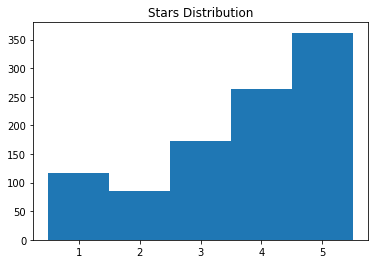

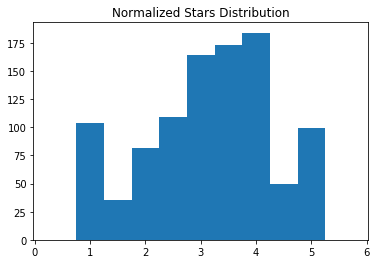

In [311]:
plt.hist(QAll['stars'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.title("Stars Distribution")
plt.show()

plt.hist(QAll['Adj_Stars'], bins=[0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25,5.75])
plt.title("Normalized Stars Distribution")
plt.show()

In [313]:
QOutput = QAll.drop(['Mean', 'Std', 'Count', 'T-score', 'MeanLow',
       'StdLow', 'CountLow', 'T-scoreLow', 'MeanHigh', 'StdHigh', 'CountHigh',
       'T-scoreHigh'], axis=1)

In [316]:
# Output results to json file
json = QOutput.to_json("user_normalizedStars.json", orient='records')
